# Quantifying the World: Case Study 2
Eric Romero, Patricia Attah, Antonio Debouse

### Table of Contents:

   * <a href="#1"> Business Understanding </a>
   * <a href="#2"> Data Evaluation/Engineering </a>
   * <a href="#3"> Modeling Preparations </a>
   * <a href="#4"> Model Building and Evaluation </a>
   * <a href="#5"> Model Interpretability and Explainability </a>
   * <a href="#6"> Case Conclusions </a>

<a id="1"></a>
## Business Understanding
To assist the medical community, we were asked to analysis a dataset from a diabetes study to predict hospital readmission of a patient within 30 days of initial hospitalization. The dataset involves 101,766 observations with 50 variables gathered over 10 years from over 130 hospitals. Concerns have been stated in recent research about including variables like race that can and has led to discriminatory actions; however, we chose to leave these variables in for complete accuracy. If these variables prove to be of significant importance, then we will encourage more resources be directed based on those variables and not to be shortsighted by deflecting or avoiding. We will be using a logistic regression since our targeted variable (readmission within 30 days) is of the categorical type. 

### Task Summary:
* Build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importances as part of your submission.    
* Predict readmission of the patient within 30 days of initial hospitalization. 


<a id="2"></a>
## Data Evaluation/Engineering

In [1]:
import pandas as pd
import numpy as np

In [14]:
df1 = pd.read_csv('year1.csv')
df2 = pd.read_csv('year2.csv')
df3 = pd.read_csv('year3.csv')
df4 = pd.read_csv('year4.csv')
df5 = pd.read_csv('year5.csv')

In [15]:
diabetic_df.columns.values.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [16]:
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),...,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),...,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),...,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),...,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),...,No,No,Ch,Yes,NO


In [17]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,...,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,...,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,...,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,...,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,...,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,...,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,...,81.000000,42.000000,76.000000,21.000000,16.000000


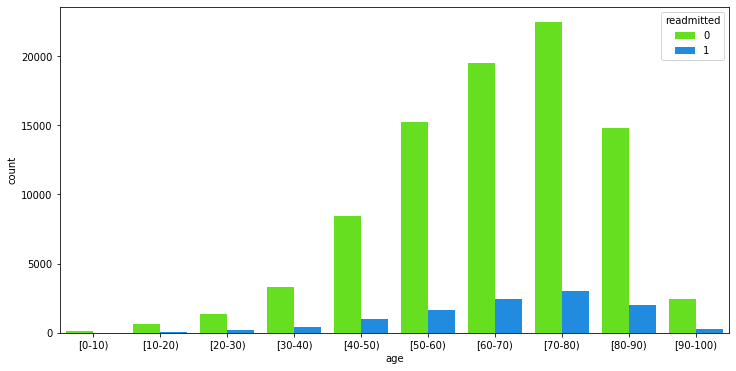

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=diabetic_df,x='age',hue='readmitted',palette='gist_rainbow')

* Patient ages were more prevalent near 70 years old in the dataset. Readmittance displays some trend in line with the age groupings where 70-80 years of age showed the highest cases of readmission. As the increases in admission is not directly proportional to the increases in counts for each age group it would indicate other factors are influencing the admission rate.

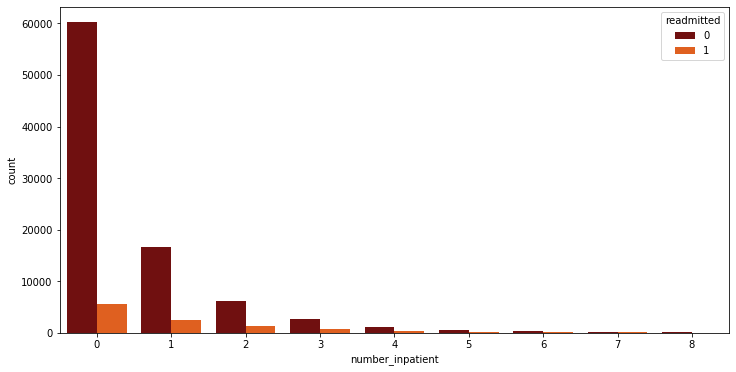

In [127]:
plt.figure(figsize=(12,6))
sns.countplot(data=diabetic_df,x='number_inpatient',hue='readmitted',palette='gist_heat',order=diabetic_df.number_inpatient.value_counts().iloc[:9].index)

* Increased amounts of inpatient treatments shows a right skewed trend for both readmitted and non-readmitted patients. As the number of treatments increases we see that both categories become more equalized indicating that higher amounts of inpatient treatments may result in a higher propability of readamittance.

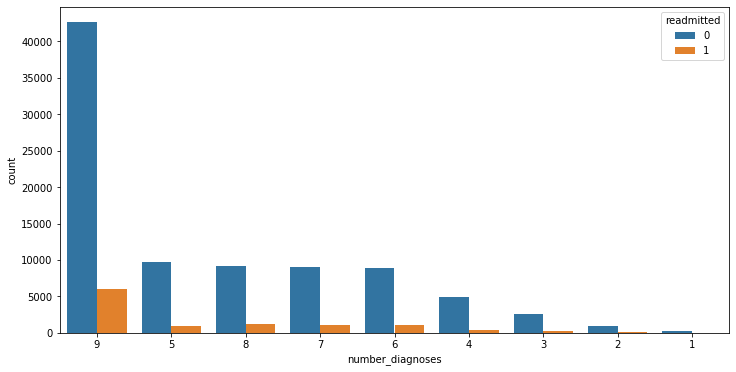

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(data=diabetic_df,x='number_diagnoses',hue='readmitted',order=diabetic_df.number_diagnoses.value_counts().iloc[:9].index)

* Patient number diagnoses shows mostly similar trends for diagnoses 1 to 8 with slight increases over diagnoses 4. Notably patients with diagnoses 9 make up a significantly higher proportion of the patient data. Increases in readmission for these patients, while higher than other groups, is more likely due to the increased amount of total patients with that particular number of diagnoses.  

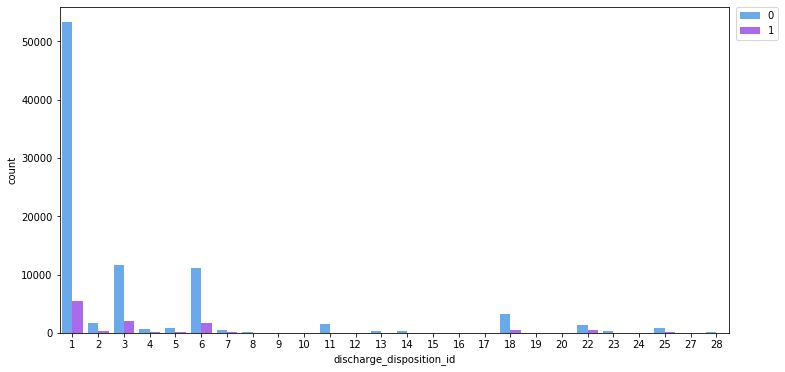

In [142]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=diabetic_df,x='discharge_disposition_id',hue='readmitted', palette='cool')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

* Three specific discharge IDs make up a majority of the patient data, ID 1 being patients discharged to home. As this category hold a majority of the patient data it is likely to be the reason for the highest levels of readmission as well. 
* ID 3 was patients transferred to skilled nursing facilities while ID 6 was those sent home with home health services. Both IDs display similar levels of readmission much higher than other IDs indicating they are likely related to the probability of readmission. As they need continued care outside the hostipal visit, patients would likely have larger risks of complications than other patients leading to higher risk of readmission. This is similarly true for ID 22 where patients were transferred to a rehab facility and needed additional health care services.

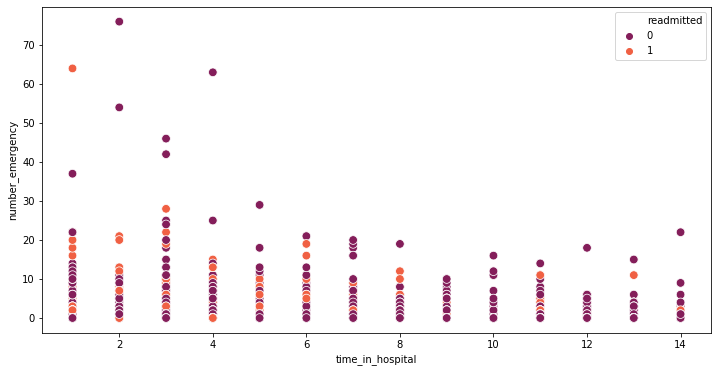

In [120]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=diabetic_df,x='time_in_hospital',y='number_emergency',hue='readmitted',palette='rocket',s=75)

* Time spent in the hospital vs number of emergencies for each patient provides no obvious relationships though it is notable that less time spent in hospital shows increased chances of readmission over those with longer durations. This makes sense as patients released too early would be more at risk to health complications than those that stayed longer. 
* The number of emergencies has no noticeable increases of readmission at any particular level other than a slight increase at less hospital time. However, even in cluster of outliers at the top left with significantly higher number of emergencies there is little increase in the amount of readmitted patients.

## Data Cleaning

In [18]:
#Change data types to category
diabetic_df[1:3] = diabetic_df[1:3].astype("category")
diabetic_df[21:49] = diabetic_df[21:49].astype("category")

In [19]:
#change ? to NaN values
diabetic_df = diabetic_df.replace('?', np.NaN)
#replace No and >30 with 0, <30 with 1
diabetic_df['readmitted'] = diabetic_df['readmitted'].replace('NO', 0)
diabetic_df['readmitted'] = diabetic_df['readmitted'].replace('>30', 0)
diabetic_df['readmitted'] = diabetic_df['readmitted'].replace('<30', 1)

### Missing Values

In [20]:
pd.set_option('display.max_rows', None)
#Missing values
print (diabetic_df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

* Approximately 2% of the race attribute is missing, if race is to be used as a predictor these specific patients will be removed as there is no way to impute this information.
* Almost every single weight attribute is missing, therefore this column will be removed from the data set as it can not be imputed from other included data.
* Payer code and medical speciality are missing from about half of the data, these values are not able to be imputed from other data and will both need to be removed as predictors.
* Diag 1-3 are all missing values from a small percentage but these attributes are likely to be useful predictors, values can be imputed from the mean for patients missing this data.
    * There are several non-numeric values that will be converted to NaN and then imputed from the mean
* Encounter ID and Patient number are for tracking purposes and should have no correlation to readmittance therefore they will be removed from the dataset.

#### Removal and Imputation of Missing Data

In [21]:
#Removing non-imputable attributes and patients
diabetic_df = diabetic_df.drop(['encounter_id','patient_nbr','weight', 'payer_code','medical_specialty'], axis=1) #remove non useful or imputable columns
diabetic_df = diabetic_df.dropna(subset=['race'])

In [22]:
#converting non-numeric (V57, E909, etc) values to NaN
diabetic_df['diag_1'] = pd.to_numeric(diabetic_df['diag_1'], errors='coerce')
diabetic_df['diag_2'] = pd.to_numeric(diabetic_df['diag_2'], errors='coerce')
diabetic_df['diag_3'] = pd.to_numeric(diabetic_df['diag_3'], errors='coerce')

In [23]:
#replace diag NaN values with imputed mean
diabetic_df['diag_1'] = diabetic_df['diag_1'].fillna(diabetic_df['diag_1'].mean())
diabetic_df['diag_2'] = diabetic_df['diag_2'].fillna(diabetic_df['diag_2'].mean())
diabetic_df['diag_3'] = diabetic_df['diag_3'].fillna(diabetic_df['diag_3'].mean())

In [24]:
pd.set_option('display.max_rows', None)
#Verify no Missing values
print (diabetic_df.isnull().sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [25]:
pd.set_option('display.max_rows', 10)

#### One Hot Encoding Categorical attributes

In [26]:
encoded_df = pd.DataFrame()

In [27]:
encoded_df = encoded_df.append(pd.get_dummies(diabetic_df))

In [28]:
pd.set_option('display.max_columns', None)
encoded_df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,250.83,438.488831,418.154651,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0
1,1,1,7,3,59,0,18,0,0,0,276.00,250.010000,255.000000,9,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
2,1,1,7,2,11,5,13,2,0,1,648.00,250.000000,418.154651,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1
3,1,1,7,2,44,1,16,0,0,0,8.00,250.430000,403.000000,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
4,1,1,7,1,51,0,8,0,0,0,197.00,157.000000,250.000000,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,250.13,291.000000,458.000000,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1
101762,1,4,5,5,33,3,18,0,0,1,560.00,276.000000,787.000000,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0

In [29]:
pd.set_option('display.max_columns', 10)

<a id="3"></a>
## Modeling Preparation

* We will be using a logistic regression model to make predictions on the readmittance of patients. Logistic regression would be most appropriate due the categorical nature of the target we are predicting with the model.


* Recall would be the most useful metric for this model as it measures how many unhealthy patients were incorrectly predicted as not readmitted when they should have been. Recall of the readmitted group would be the most severe outcome which would be the best measure of our models usefulness. 

In [30]:
X = encoded_df.drop(columns=['readmitted']) 
y = encoded_df.loc[:,'readmitted']

In [31]:
from collections import Counter
Counter(y) #verifying target Readmitted 0:NO,1:YES

Counter({0: 88324, 1: 11169})

* The dataset had 11.22% of patients readmitted back into the hospital within 30 days. Our goal is to create a model that will be able to predict those who were readmitted within 30 days at a higher accuracy than 11.22%.


### Data Normalization
* Data will be normalized to reduce any magnitude disparities between the attibute values

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2.738225,4.004083,-1.171391,-1.137751,-0.105230,...,-0.00317,-0.925654,0.925654,1.823621,-1.823621
1,-0.708032,-0.516230,0.301764,-0.468175,0.808672,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359
2,-0.708032,-0.516230,0.301764,-0.802963,-1.628401,...,-0.00317,-0.925654,0.925654,-0.548359,0.548359
3,-0.708032,-0.516230,0.301764,-0.802963,0.047087,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359
4,-0.708032,-0.516230,0.301764,-1.137751,0.402493,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359
...,...,...,...,...,...,...,...,...,...,...,...
99488,-0.708032,-0.139538,0.301764,-0.468175,0.402493,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359
99489,-0.708032,0.048809,-0.189288,0.201402,-0.511409,...,-0.00317,-0.925654,0.925654,-0.548359,0.548359
99490,-0.708032,-0.516230,0.301764,-1.137751,0.504038,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359
99491,-0.018781,-0.139538,0.301764,1.875344,0.097859,...,-0.00317,1.080317,-1.080317,-0.548359,0.548359


<a id="4"></a>
## Modeling Building and Evaluation

### Logistic Regression Base Model

In [33]:
%%time
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty='l1')
LR_model.fit(X_scaled,y)
LR_model.score(X_scaled,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 17.8 s


0.8876101836310092

In [35]:
LR_model.coef_

array([[-3.22074986e-02,  1.29160419e-01, -3.48845305e-02,
         4.22763688e-02,  1.32098598e-02, -4.17515300e-02,
         3.94480525e-02, -4.14676202e-03,  3.48093334e-02,
         3.28300728e-01, -2.97977911e-02, -2.10097458e-02,
         2.31740572e-02,  7.93523800e-02, -4.16489699e-04,
         1.07117268e-03,  3.20776386e-03,  0.00000000e+00,
        -1.03143686e-02, -2.00575929e-05,  8.13879732e-03,
        -9.81132967e-03, -5.85823518e-02, -4.46215797e-02,
        -1.63116228e-05,  0.00000000e+00, -2.29598434e-02,
        -5.32686026e-02,  2.13674384e-03,  2.12587591e-02,
         1.73802891e-02, -6.85210356e-03,  4.16420506e-03,
         0.00000000e+00, -3.32620828e-02,  7.12657807e-04,
        -3.35225680e-03,  0.00000000e+00,  3.33696044e-02,
        -5.04798405e-03,  1.52842566e-02,  2.51579479e-02,
        -2.21943682e-02, -2.16871896e-02, -1.57016405e-02,
        -6.88221592e-03,  0.00000000e+00,  1.37307879e-02,
        -1.51450742e-03,  0.00000000e+00,  5.54576178e-0

In [36]:
X_scaled.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_No',
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=114)

In [34]:
coef_df = pd.DataFrame(LR_model.coef_, columns=X_scaled.columns)
coef_abs = coef_df.abs()
coef_abs = coef_abs.T.sort_values(by=[0], ascending=False)
coef_abs.tail(20)

,0
repaglinide_Steady,0.0
race_Hispanic,0.0
glipizide_Steady,0.0
chlorpropamide_Steady,0.0
metformin-rosiglitazone_No,0.0
...,...
citoglipton_No,0.0
examide_No,0.0
miglitol_No,0.0
tolazamide_Steady,0.0


#### L1 Penalty for Feature Selection
* Running the initial logistic regression model using L1 penalties 19 attribute coefficients were reduced to zero (seen in table above) indicating they have little to no correlation to the target category. These coefficients will be removed and a reduced dataset will be run through a cross validation model using a liblinear solver (L1 and L2 penalties) to reduce any overfitting that may also be occuring.

In [151]:
#feature elimination based on coefficient results from L1 penalty
X_reduced = X_scaled.drop(['race_Hispanic','glyburide-metformin_Steady','metformin-rosiglitazone_No','age_[30-40)',
                           'glyburide_Steady','insulin_No','max_glu_serum_>300','citoglipton_No','examide_No','A1Cresult_>8',
                           'miglitol_No','repaglinide_Steady','acarbose_No','rosiglitazone_Steady','nateglinide_No',
                           'chlorpropamide_Steady','pioglitazone_No','glipizide_Steady','tolazamide_Steady'], axis=1)

### Logistic Regression with 5-fold Cross Validation
#### Liblinear Solver (L1 and L2 Penalties)

In [165]:
%%time
from sklearn.linear_model import LogisticRegressionCV
LRCV_model = LogisticRegressionCV(cv=5, random_state=0, solver='liblinear') #liblinear includes L1 and L2 penalties
LRCV_model.fit(X_reduced,y)
LRCV_model.score(X_reduced,y)

Wall time: 2min 8s


0.8877508970480336

In [166]:
coef_df = pd.DataFrame(LRCV_model.coef_, columns=X_reduced.columns)
coef_abs = coef_df.abs()
coef_abs = coef_abs.T.sort_values(by=[0], ascending=False)
coef_abs.head(20)

,0
number_inpatient,0.276015
discharge_disposition_id,0.100955
number_diagnoses,0.059275
age_[50-60),0.036274
time_in_hospital,0.036145
insulin_Down,0.035953
number_emergency,0.035409
diabetesMed_No,0.034146
diabetesMed_Yes,0.034146
num_medications,0.032088


### Coefficient Interpretation
Above the Coefficients are sorted in descending order with the variable having the highest absolute value at the top down to variables with very low coefficients at the bottom, several came out to zero due to penalties inducing sparcity. The most important variable is <b>number_inpatient</b> which is a discrete variable with a coefficient value at <b>0.276</b> for the cross validation regression model. This is interpreted as the expected change in log odds for a one-unit increase in the number_inpatient. 

The odds ratio can be calculated by exponentiating this value to get <b>1.13</b> which means we expect to see about <b>31% increase</b> in the odds of being in an readmitted, for a one-unit increase in number_inpatient.

The next most influential variable is <b> discharge_disposition_id </b> with a <b>0.0100</b> expected change in log odds for a one unit increase in discharge_disposition_id. This gives us and exponent of <b>1.105</b> which means there is an <b>10% increase</b> in odds of being readmitted, for one unit increase in number_diagnoses.

<a id="5"></a>
## Modeling Interpretability and Explainability

In [156]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression(random_state=0, solver='lbfgs')
LRCV_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [157]:
y_pred = LRCV_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LRCV_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26585
           1       0.44      0.01      0.02      3263

    accuracy                           0.89     29848
   macro avg       0.67      0.50      0.48     29848
weighted avg       0.84      0.89      0.84     29848



#### Metric Evaluations

From the above table we can see that the precision for 0 which is the patients that were not readmitted is 0.89 while the precision for the readmitted patients were 0.44. The precision for the critical group we are trying to predict is quite low in comparison to those that were not readmitted. This needs improvement to become a better model for our purposes, though it is at least more precise than a random guess. The precision focuses on the cost of the false positives which means the healthy patient was predicted as needing readmission when they should not have been. This situation is not a very severe outcome and therefore precision will not be our main critical metric for this model.

Recall focuses on the false negatives, meaning an unhealthy patient was not predicted for readmission when they should have been which may result in a severely dire outcome. This makes <b> recall</b> our primary metric of choice for this model. For the people who were not readmitted the model had a perfect score of 1.00, however for the crtitical group that should have been readmitted there was a very low score of 0.01. This result means that predictions regarding the most important group for our model did very little in terms of performance in spite of a good accuracy for the overall model.

<a id="6"></a>
## Case Conclusions

Our model did not perform well in the critical method metric of choice which was the recall at a score of 0.01. There are  several additional methods that could be used to improve performance. 
* The count of readmitted patients was 11.22% of the total data, being highly imbalanced in this way there was not enough training for the model to predict accurately. An alternative method that could be used to counter this is stratified k-fold cross validation which would divide the dataset in each cross validation evenly. 
* Another method would be to under or over sampling on the data. Under sampling may have been preferred so that there would not be too many repititions of the underrepresented group which may overfit the data giving false impressions of the results. Though this would also risk shrinking the dataset making it less effective or loss of some critical information.
* Obtaining additional patient data around inpatient treatment data from domain experts would be particularly useful for improving the model by differentiating treatment types given to patients more at risk of readmission.

What we were able to find using the model and could relate to customers is that the two most important variables found were the number of inpatients treatments and the discharge diagnoses. 
* The highest related variable was the inpatient treatments. This means that the more the patient had treatments in hospital also meant they were more likely to be readmitted. 
* The second most important variable was the discharge diagnosis ID which relayed where patients were sent after release from the hospital. Particularly those discharged to additional outside healthcare services such as nursing care or rehabilitation showed significant increase in probability they would be readmitted.